## MNIST数据集的深度学习实现方式
本文简要介绍两个神经网络算法，分别是一个浅层和深层（相对）的网络来对MNIST数据集的预测
开始之前先导入必要的数据集以及简单看下数据集的样子吧

In [1]:
# 分别导入数据集和绘图工具
from keras.datasets import mnist
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 导入数据集集 并看下数据集的格式
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images shape {}, train_labels shape {}'.format(train_images.shape, train_labels.shape))
print('test_images shape {}, test_labels shape {}'.format(test_images.shape, test_labels.shape))

train_images shape (60000, 28, 28), train_labels shape (60000,)
test_images shape (10000, 28, 28), test_labels shape (10000,)


In [3]:
# 拿出一张来看下
train_images_1 = train_images[:1].reshape(28, 28)
train_labels_1 = train_labels[:1]
print(train_images_1.shape)
print(train_labels_1)

(28, 28)
[5]


Text(0.5,1,'number 5')

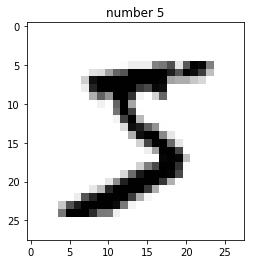

In [5]:
# 用绘图工具绘制下图形，cmap = ptl.cm.binary就是显示只有黑白两个颜色的图形
plt.imshow(train_images_1, plt.cm.binary)
plt.title('number {}'.format(train_labels_1[0]))

In [6]:
# 导入keras的 models 和 laysers
from keras import models
from keras import layers

In [8]:
# 数据预处理
# 我们这里将图片数据拉长成为一个长向量，方便我们构建网络
train_data = train_images.reshape((train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
test_data = test_images.reshape((test_images.shape[0], test_images.shape[1]*test_images.shape[2]))
print('train_data shape {}, test_data shape{}'.format(train_data.shape, test_data.shape))

train_data shape (60000, 784), test_data shape(10000, 784)


In [9]:
# 将数据转换为0-1的范围
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [10]:
# 导入one-hot处理模块
from keras.utils.np_utils import to_categorical

In [11]:
print('origin labels[0] = ',train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('after to_categorical() labels[0] = ',train_labels[0])

origin labels[0] =  5
after to_categorical() labels[0] =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# 划分下数据集，将前10000个划分成验证集，剩下的为训练集，这样方便我们比较模型
x_val = train_data[:10000]
x_train = train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [13]:
print(x_val.shape, x_train.shape)

(10000, 784) (50000, 784)


In [14]:
# 定义一个浅层的网络
def shallow_network():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(28*28, )))
    model.add(layers.Dense(10, activation='softmax'))
    # 用rmsprop优化器，损失函数选取交叉熵函数
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [15]:
# 定义一个深层（相对）的网络
def deeper_network():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(28*28, )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    # 用rmsprop优化器，损失函数选取交叉熵函数
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [16]:
# 开始训练，并且保存训练的模型
shallow_model = shallow_network()
his_shallow = shallow_model.fit(x_train, y_train, epochs=5, batch_size=128,validation_data=(x_val, y_val))
his_shallow_dict = his_shallow.history
print(his_shallow_dict.keys())

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 83us/step - loss: 0.5046 - acc: 0.8681 - val_loss: 0.2862 - val_acc: 0.9220
Epoch 2/5
50000/50000 [==============================] - 1s 19us/step - loss: 0.2606 - acc: 0.9271 - val_loss: 0.2352 - val_acc: 0.9357
Epoch 3/5
50000/50000 [==============================] - 1s 19us/step - loss: 0.2165 - acc: 0.9384 - val_loss: 0.2149 - val_acc: 0.9402
Epoch 4/5
50000/50000 [==============================] - 1s 18us/step - loss: 0.1877 - acc: 0.9466 - val_loss: 0.1842 - val_acc: 0.9475
Epoch 5/5
50000/50000 [==============================] - 1s 19us/step - loss: 0.1667 - acc: 0.9519 - val_loss: 0.1810 - val_acc: 0.9479
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [17]:
# 开始训练，并且保存训练的模型
deeper_model = deeper_network()
his_deeper = deeper_model.fit(x_train, y_train, epochs=5, batch_size=128,validation_data=(x_val, y_val))
his_deeper_dict = his_deeper.history
print(his_deeper_dict.keys())

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1s 24us/step - loss: 0.3995 - acc: 0.8899 - val_loss: 0.2372 - val_acc: 0.9308
Epoch 2/5
50000/50000 [==============================] - 1s 21us/step - loss: 0.1814 - acc: 0.9472 - val_loss: 0.1561 - val_acc: 0.9524
Epoch 3/5
50000/50000 [==============================] - 1s 21us/step - loss: 0.1359 - acc: 0.9592 - val_loss: 0.1335 - val_acc: 0.9607
Epoch 4/5
50000/50000 [==============================] - 1s 21us/step - loss: 0.1095 - acc: 0.9670 - val_loss: 0.1243 - val_acc: 0.9629
Epoch 5/5
50000/50000 [==============================] - 1s 21us/step - loss: 0.0922 - acc: 0.9722 - val_loss: 0.1062 - val_acc: 0.9685
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [18]:
# 来比较下不同网络在测试集下的精度
test_shallow_loss, test_shallow_acc = shallow_model.evaluate(test_data, test_labels)
test_deeper_loss, test_deeper_acc = deeper_model.evaluate(test_data, test_labels)
print('shallow_acc ', test_shallow_acc)
print('deeper_acc ', test_deeper_acc)

10000/10000 [==============================] - 0s 27us/step
shallow_acc  0.9479
deeper_acc  0.968


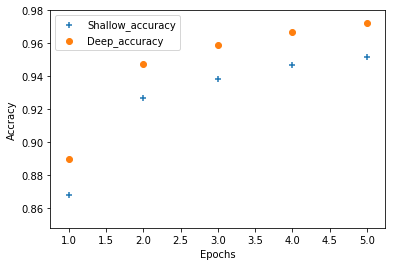

In [19]:
# 下面可以对比下两个模型的精度比对
shallow_acc_value = his_shallow_dict['acc']
deeper_acc_value = his_deeper_dict['acc']
Epchos = range(1, len(deeper_acc_value) + 1)
plt.scatter(Epchos, shallow_acc_value, marker='+', label='Shallow_accuracy')
plt.scatter(Epchos, deeper_acc_value, marker='o', label='Deep_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accracy')
plt.legend()
plt.show()

In [20]:
# 最后可以用函数来看下模型的层数
shallow_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 最后可以用函数来看下模型的层数
deeper_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 一般训练完可以将模型保存下，这是个好习惯
shallow_model.save('shallow_model_mnist.h5')
deeper_model.save('deeper_model_mnist.h5')